# Classification algorithms

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('pca.csv')

df.head()

,0,1,2,3,4,5,6,7,8,9,target
0,5.957317,-2.194385,-1.450285,-0.167148,-0.694979,-0.383369,1.456618,0.103518,0.583459,0.439535,0
1,7.939563,0.090557,0.441206,-0.930053,-0.375203,0.302911,-0.491021,0.222821,0.333514,0.159313,0
2,6.970815,-2.199521,-0.032964,-2.348542,0.884256,-0.283119,-0.102020,0.017021,0.585696,-0.301648,0
3,1.593908,4.791936,0.057138,-1.166422,-0.316182,0.360219,0.152939,-0.034419,0.303600,-0.048691,0
4,4.770630,-0.386930,-0.959552,0.357948,-0.467621,-0.502110,0.353892,-0.149115,-0.027879,0.261603,0


## Data split

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns = 'target')
y = df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
y_train.value_counts()

1    226
0     87
Name: target, dtype: int64

## Dataset balancing

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [11]:
y_train.value_counts()

0    226
1    226
Name: target, dtype: int64

## GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

In [112]:
def GridParam(x,y, model, parameters, scoring):
    X_grid, Y_grid = x, y

    grid = GridSearchCV(model, parameters, cv=10, scoring = scoring)
    grid.fit(X_grid, Y_grid)
    
    print(f'The parameters combination that would give best {scoring} are: ')
    print(grid.best_params_)
    print(f'The best {scoring} achieved: {grid.best_score_}')

    return grid

## Random Forest + GridSearchCV

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc_param = {'max_features':[3,5,7],'max_depth':[3,5,7], 'min_samples_leaf': [2,3] }
grid = GridParam(X_train, y_train, RandomForestClassifier(random_state = 0), rfc_param, 'recall')

The parameters combination that would give best recall are: 
{'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 2}
The best recall achieved: 0.9604743083003953


In [39]:
rfc_best = RandomForestClassifier(max_features = grid.best_params_["max_features"], max_depth = grid.best_params_["max_depth"],
                                  min_samples_leaf = grid.best_params_["min_samples_leaf"], random_state = 0)

In [40]:
rfc_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=3, min_samples_leaf=2,
                       random_state=0)

### Metrics

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

Accuracy: 0.9481481481481482


Text(0.5, 15.0, 'Predicted label')

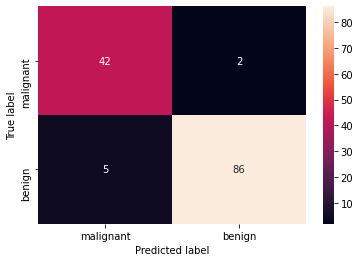

In [23]:
y_pred=rfc_best.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

cf_Matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_Matrix, annot=True, xticklabels = ['malignant', 'benign'], yticklabels = ['malignant' ,'benign'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Support Vector Machines (SVM)

In [24]:
from sklearn.svm import SVC

In [41]:
svc_param = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridParam(X_train, y_train, SVC(random_state = 0), svc_param, 'recall')

The parameters combination that would give best recall are: 
{'kernel': 'poly'}
The best recall achieved: 0.9954545454545455


In [42]:
svm_best = SVC(kernel = grid.best_params_["kernel"], random_state = 0)

In [43]:
svm_best.fit(X_train,y_train)

SVC(kernel='poly', random_state=0)

### Metrics

Accuracy: 0.9259259259259259


Text(0.5, 15.0, 'Predicted label')

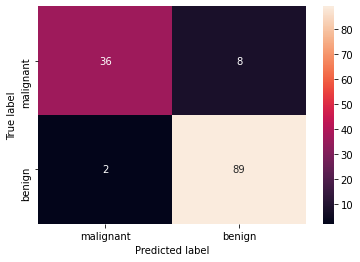

In [30]:
y_pred=svm_best.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

cf_Matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_Matrix, annot=True, xticklabels = ['malignant', 'benign'], yticklabels = ['malignant' ,'benign'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

## K-Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn_param = {'n_neighbors':[2,5,7,10], 'metric':['minkowski','manhattan','cosine']}
grid = GridParam(X_train, y_train, KNeighborsClassifier(), knn_param, 'recall')

The parameters combination that would give best recall are: 
{'metric': 'minkowski', 'n_neighbors': 5}
The best recall achieved: 0.9648221343873518


In [51]:
knn_best = KNeighborsClassifier(n_neighbors = grid.best_params_["n_neighbors"], metric = grid.best_params_["metric"])

In [52]:
knn_best.fit(X_train,y_train)

KNeighborsClassifier()

### Metrics

Accuracy: 0.9481481481481482


Text(0.5, 15.0, 'Predicted label')

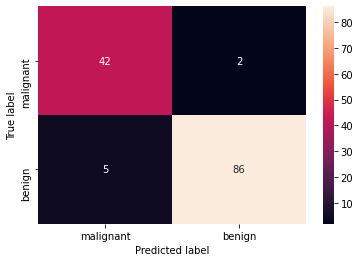

In [54]:
y_pred=knn_best.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

cf_Matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_Matrix, annot=True, xticklabels = ['malignant', 'benign'], yticklabels = ['malignant' ,'benign'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Artificial Neural Networks

In [101]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import Recall

In [106]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim = len(X_train.columns)))
model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [107]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy',Recall(name = 'recall')])

In [108]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
15/15 [==============================] - 1s 5ms/step - loss: 0.2321 - accuracy: 0.9292 - recall: 0.8938
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1140 - accuracy: 0.9712 - recall: 0.9690
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0524 - accuracy: 0.9845 - recall: 0.9867
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0438 - accuracy: 0.9845 - recall: 0.9912
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0357 - accuracy: 0.9889 - recall: 0.9956
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0307 - accuracy: 0.9912 - recall: 0.9912
Epoch 7/20
15/15 [==============================] - 0s 6ms/step - loss: 0.0193 - accuracy: 0.9956 - recall: 1.0000
Epoch 8/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0149 - accuracy: 0.9956 - recall: 1.0000
Epoch 9/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0070 -

### Metrics

Accuracy: 0.9851851851851852


Text(0.5, 15.0, 'Predicted label')

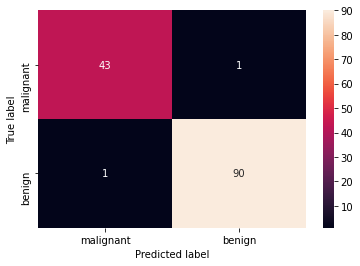

In [109]:
y_pred=model.predict(X_test)
y_pred = y_pred.reshape(-1)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

print("Accuracy:",accuracy_score(y_test, y_pred))

cf_Matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_Matrix, annot=True, xticklabels = ['malignant', 'benign'], yticklabels = ['malignant' ,'benign'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Multi Layer Perceptron (MLP)

In [110]:
from sklearn.neural_network import MLPClassifier

In [113]:
mlp_param = {"learning_rate_init": [0.0001, 0.001], "alpha": [0.0001, 0.001, 0.005]}
model = MLPClassifier(
        activation="relu",
        solver="adam",
        early_stopping=True,
        max_iter=200,
        hidden_layer_sizes=(512,),
        verbose=True,)
grid = GridParam(X_train, y_train, model, mlp_param, 'recall')

Iteration 1, loss = 0.71523839
Validation score: 0.292683
Iteration 2, loss = 0.70560810
Validation score: 0.463415
Iteration 3, loss = 0.69629892
Validation score: 0.536585
Iteration 4, loss = 0.68689934
Validation score: 0.585366
Iteration 5, loss = 0.67793595
Validation score: 0.634146
Iteration 6, loss = 0.66888456
Validation score: 0.707317
Iteration 7, loss = 0.66003959
Validation score: 0.707317
Iteration 8, loss = 0.65122191
Validation score: 0.804878
Iteration 9, loss = 0.64284137
Validation score: 0.829268
Iteration 10, loss = 0.63440444
Validation score: 0.829268
Iteration 11, loss = 0.62614884
Validation score: 0.853659
Iteration 12, loss = 0.61805296
Validation score: 0.878049
Iteration 13, loss = 0.61014615
Validation score: 0.902439
Iteration 14, loss = 0.60251984
Validation score: 0.902439
Iteration 15, loss = 0.59486516
Validation score: 0.902439
Iteration 16, loss = 0.58738336
Validation score: 0.902439
Iteration 17, loss = 0.58007754
Validation score: 0.902439
Iterat

Validation score: 0.853659
Iteration 31, loss = 0.52942561
Validation score: 0.853659
Iteration 32, loss = 0.52434088
Validation score: 0.853659
Iteration 33, loss = 0.51930846
Validation score: 0.853659
Iteration 34, loss = 0.51429295
Validation score: 0.853659
Iteration 35, loss = 0.50947300
Validation score: 0.853659
Iteration 36, loss = 0.50467618
Validation score: 0.853659
Iteration 37, loss = 0.49996240
Validation score: 0.853659
Iteration 38, loss = 0.49533294
Validation score: 0.878049
Iteration 39, loss = 0.49082952
Validation score: 0.878049
Iteration 40, loss = 0.48629408
Validation score: 0.878049
Iteration 41, loss = 0.48192645
Validation score: 0.878049
Iteration 42, loss = 0.47757281
Validation score: 0.878049
Iteration 43, loss = 0.47329085
Validation score: 0.878049
Iteration 44, loss = 0.46907330
Validation score: 0.878049
Iteration 45, loss = 0.46499282
Validation score: 0.902439
Iteration 46, loss = 0.46090215
Validation score: 0.902439
Iteration 47, loss = 0.456869

Validation score: 0.829268
Iteration 14, loss = 0.53776300
Validation score: 0.829268
Iteration 15, loss = 0.53119378
Validation score: 0.853659
Iteration 16, loss = 0.52474847
Validation score: 0.853659
Iteration 17, loss = 0.51838671
Validation score: 0.853659
Iteration 18, loss = 0.51222269
Validation score: 0.853659
Iteration 19, loss = 0.50617222
Validation score: 0.853659
Iteration 20, loss = 0.50013419
Validation score: 0.853659
Iteration 21, loss = 0.49429680
Validation score: 0.853659
Iteration 22, loss = 0.48858016
Validation score: 0.878049
Iteration 23, loss = 0.48298522
Validation score: 0.878049
Iteration 24, loss = 0.47751265
Validation score: 0.878049
Iteration 25, loss = 0.47212891
Validation score: 0.878049
Iteration 26, loss = 0.46683940
Validation score: 0.878049
Iteration 27, loss = 0.46164007
Validation score: 0.878049
Iteration 28, loss = 0.45661100
Validation score: 0.878049
Iteration 29, loss = 0.45159060
Validation score: 0.878049
Iteration 30, loss = 0.446723

Validation score: 0.975610
Iteration 16, loss = 0.17852284
Validation score: 0.975610
Iteration 17, loss = 0.16832895
Validation score: 0.975610
Iteration 18, loss = 0.15952526
Validation score: 0.975610
Iteration 19, loss = 0.15132516
Validation score: 0.975610
Iteration 20, loss = 0.14389268
Validation score: 0.975610
Iteration 21, loss = 0.13740222
Validation score: 0.975610
Iteration 22, loss = 0.13113890
Validation score: 0.975610
Iteration 23, loss = 0.12548456
Validation score: 0.975610
Iteration 24, loss = 0.12031899
Validation score: 0.975610
Iteration 25, loss = 0.11561111
Validation score: 0.975610
Iteration 26, loss = 0.11120059
Validation score: 0.975610
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.82024714
Validation score: 0.487805
Iteration 2, loss = 0.71331465
Validation score: 0.609756
Iteration 3, loss = 0.61938245
Validation score: 0.780488
Iteration 4, loss = 0.54260602
Validation score: 0.902439

Validation score: 0.902439
Iteration 10, loss = 0.58435999
Validation score: 0.902439
Iteration 11, loss = 0.57702961
Validation score: 0.951220
Iteration 12, loss = 0.56993582
Validation score: 0.951220
Iteration 13, loss = 0.56291673
Validation score: 0.951220
Iteration 14, loss = 0.55606039
Validation score: 0.975610
Iteration 15, loss = 0.54936516
Validation score: 0.975610
Iteration 16, loss = 0.54277100
Validation score: 0.975610
Iteration 17, loss = 0.53624859
Validation score: 0.975610
Iteration 18, loss = 0.53004558
Validation score: 0.975610
Iteration 19, loss = 0.52385524
Validation score: 0.975610
Iteration 20, loss = 0.51763357
Validation score: 0.975610
Iteration 21, loss = 0.51184945
Validation score: 0.975610
Iteration 22, loss = 0.50601975
Validation score: 0.975610
Iteration 23, loss = 0.50025094
Validation score: 0.975610
Iteration 24, loss = 0.49466551
Validation score: 0.975610
Iteration 25, loss = 0.48920074
Validation score: 0.975610
Validation score did not impr

Validation score: 0.975610
Iteration 33, loss = 0.50512148
Validation score: 0.975610
Iteration 34, loss = 0.49999468
Validation score: 0.975610
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.64957769
Validation score: 0.560976
Iteration 2, loss = 0.64074495
Validation score: 0.560976
Iteration 3, loss = 0.63231732
Validation score: 0.560976
Iteration 4, loss = 0.62393688
Validation score: 0.585366
Iteration 5, loss = 0.61569532
Validation score: 0.585366
Iteration 6, loss = 0.60735033
Validation score: 0.609756
Iteration 7, loss = 0.59949166
Validation score: 0.609756
Iteration 8, loss = 0.59158074
Validation score: 0.634146
Iteration 9, loss = 0.58401196
Validation score: 0.682927
Iteration 10, loss = 0.57627921
Validation score: 0.707317
Iteration 11, loss = 0.56894298
Validation score: 0.731707
Iteration 12, loss = 0.56162104
Validation score: 0.731707
Iteration 13, loss = 0.55432428
Validation score: 0.756098
Iter

Validation score: 0.951220
Iteration 47, loss = 0.38862783
Validation score: 0.951220
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70431286
Validation score: 0.512195
Iteration 2, loss = 0.69513322
Validation score: 0.512195
Iteration 3, loss = 0.68590916
Validation score: 0.536585
Iteration 4, loss = 0.67679790
Validation score: 0.609756
Iteration 5, loss = 0.66821541
Validation score: 0.609756
Iteration 6, loss = 0.65920223
Validation score: 0.634146
Iteration 7, loss = 0.65053401
Validation score: 0.609756
Iteration 8, loss = 0.64201053
Validation score: 0.634146
Iteration 9, loss = 0.63375719
Validation score: 0.658537
Iteration 10, loss = 0.62558315
Validation score: 0.682927
Iteration 11, loss = 0.61733186
Validation score: 0.731707
Iteration 12, loss = 0.60961083
Validation score: 0.780488
Iteration 13, loss = 0.60177354
Validation score: 0.829268
Iteration 14, loss = 0.59400973
Validation score: 0.829268
Iter

Validation score: 0.878049
Iteration 4, loss = 0.51492837
Validation score: 0.902439
Iteration 5, loss = 0.45773469
Validation score: 0.926829
Iteration 6, loss = 0.40989225
Validation score: 0.926829
Iteration 7, loss = 0.36993359
Validation score: 0.902439
Iteration 8, loss = 0.33602892
Validation score: 0.902439
Iteration 9, loss = 0.30752337
Validation score: 0.902439
Iteration 10, loss = 0.28270273
Validation score: 0.902439
Iteration 11, loss = 0.26111800
Validation score: 0.902439
Iteration 12, loss = 0.24244813
Validation score: 0.902439
Iteration 13, loss = 0.22626395
Validation score: 0.902439
Iteration 14, loss = 0.21190334
Validation score: 0.902439
Iteration 15, loss = 0.19891289
Validation score: 0.926829
Iteration 16, loss = 0.18765796
Validation score: 0.926829
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67919390
Validation score: 0.829268
Iteration 2, loss = 0.59416393
Validation score: 0.853659
Ite

Validation score: 0.878049
Iteration 32, loss = 0.50966071
Validation score: 0.878049
Iteration 33, loss = 0.50476275
Validation score: 0.878049
Iteration 34, loss = 0.50007739
Validation score: 0.878049
Iteration 35, loss = 0.49539145
Validation score: 0.878049
Iteration 36, loss = 0.49075612
Validation score: 0.902439
Iteration 37, loss = 0.48620962
Validation score: 0.902439
Iteration 38, loss = 0.48177060
Validation score: 0.902439
Iteration 39, loss = 0.47741308
Validation score: 0.902439
Iteration 40, loss = 0.47310244
Validation score: 0.902439
Iteration 41, loss = 0.46889160
Validation score: 0.902439
Iteration 42, loss = 0.46467243
Validation score: 0.902439
Iteration 43, loss = 0.46054691
Validation score: 0.902439
Iteration 44, loss = 0.45649689
Validation score: 0.902439
Iteration 45, loss = 0.45259372
Validation score: 0.902439
Iteration 46, loss = 0.44858979
Validation score: 0.902439
Iteration 47, loss = 0.44473599
Validation score: 0.902439
Validation score did not impr

Validation score: 0.609756
Iteration 2, loss = 0.68287415
Validation score: 0.634146
Iteration 3, loss = 0.67357541
Validation score: 0.731707
Iteration 4, loss = 0.66461501
Validation score: 0.731707
Iteration 5, loss = 0.65588143
Validation score: 0.756098
Iteration 6, loss = 0.64714503
Validation score: 0.780488
Iteration 7, loss = 0.63852231
Validation score: 0.804878
Iteration 8, loss = 0.63007455
Validation score: 0.804878
Iteration 9, loss = 0.62176578
Validation score: 0.804878
Iteration 10, loss = 0.61362052
Validation score: 0.804878
Iteration 11, loss = 0.60565056
Validation score: 0.804878
Iteration 12, loss = 0.59796184
Validation score: 0.804878
Iteration 13, loss = 0.59025815
Validation score: 0.829268
Iteration 14, loss = 0.58293300
Validation score: 0.829268
Iteration 15, loss = 0.57550754
Validation score: 0.829268
Iteration 16, loss = 0.56835172
Validation score: 0.829268
Iteration 17, loss = 0.56141015
Validation score: 0.853659
Iteration 18, loss = 0.55443762
Valid

Validation score: 0.878049
Iteration 26, loss = 0.47509660
Validation score: 0.878049
Iteration 27, loss = 0.47002713
Validation score: 0.878049
Iteration 28, loss = 0.46507102
Validation score: 0.878049
Iteration 29, loss = 0.46021200
Validation score: 0.878049
Iteration 30, loss = 0.45542555
Validation score: 0.878049
Iteration 31, loss = 0.45074978
Validation score: 0.878049
Iteration 32, loss = 0.44611896
Validation score: 0.878049
Iteration 33, loss = 0.44167284
Validation score: 0.878049
Iteration 34, loss = 0.43720280
Validation score: 0.878049
Iteration 35, loss = 0.43279489
Validation score: 0.878049
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67603150
Validation score: 0.780488
Iteration 2, loss = 0.58617985
Validation score: 0.926829
Iteration 3, loss = 0.51190274
Validation score: 0.951220
Iteration 4, loss = 0.44871444
Validation score: 0.951220
Iteration 5, loss = 0.39692904
Validation score: 0.951220


Validation score: 0.926829
Iteration 15, loss = 0.19496166
Validation score: 0.926829
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73236760
Validation score: 0.439024
Iteration 2, loss = 0.64028863
Validation score: 0.707317
Iteration 3, loss = 0.56639705
Validation score: 0.878049
Iteration 4, loss = 0.50030913
Validation score: 0.853659
Iteration 5, loss = 0.44524874
Validation score: 0.853659
Iteration 6, loss = 0.39892567
Validation score: 0.853659
Iteration 7, loss = 0.35916495
Validation score: 0.853659
Iteration 8, loss = 0.32558858
Validation score: 0.853659
Iteration 9, loss = 0.29699785
Validation score: 0.853659
Iteration 10, loss = 0.27234245
Validation score: 0.853659
Iteration 11, loss = 0.25058827
Validation score: 0.853659
Iteration 12, loss = 0.23229585
Validation score: 0.853659
Iteration 13, loss = 0.21556693
Validation score: 0.853659
Iteration 14, loss = 0.20126582
Validation score: 0.853659
Vali

In [115]:
mlp_best = MLPClassifier(
        activation="relu",
        solver="adam",
        early_stopping=True,
        max_iter=200,
        hidden_layer_sizes=(512,),
        verbose=True,
        learning_rate_init = grid.best_params_["learning_rate_init"], alpha = grid.best_params_["alpha"]
)

In [116]:
mlp_best.fit(X_train,y_train)

Iteration 1, loss = 0.64387604
Validation score: 0.826087
Iteration 2, loss = 0.53103079
Validation score: 0.847826
Iteration 3, loss = 0.45021706
Validation score: 0.847826
Iteration 4, loss = 0.38842954
Validation score: 0.869565
Iteration 5, loss = 0.34188434
Validation score: 0.891304
Iteration 6, loss = 0.30380372
Validation score: 0.891304
Iteration 7, loss = 0.27350865
Validation score: 0.913043
Iteration 8, loss = 0.24887872
Validation score: 0.934783
Iteration 9, loss = 0.22822945
Validation score: 0.934783
Iteration 10, loss = 0.21001860
Validation score: 0.934783
Iteration 11, loss = 0.19491768
Validation score: 0.956522
Iteration 12, loss = 0.18182557
Validation score: 0.956522
Iteration 13, loss = 0.17006558
Validation score: 0.956522
Iteration 14, loss = 0.16014391
Validation score: 0.956522
Iteration 15, loss = 0.15112458
Validation score: 0.956522
Iteration 16, loss = 0.14356866
Validation score: 0.978261
Iteration 17, loss = 0.13672138
Validation score: 0.978261
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(512,),
              verbose=True)

### Metrics

Accuracy: 0.9555555555555556


Text(0.5, 15.0, 'Predicted label')

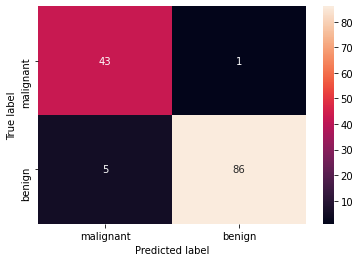

In [117]:
y_pred=mlp_best.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

cf_Matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_Matrix, annot=True, xticklabels = ['malignant', 'benign'], yticklabels = ['malignant' ,'benign'])
plt.ylabel('True label')
plt.xlabel('Predicted label')